Testing set up of Pygimli

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pygimli as pg
from pygimli.viewer.mpl import drawMesh, drawModel

from pygimli.meshtools import polytools as plc
from pygimli.meshtools import quality

import pygimli.meshtools as mt

(<AxesSubplot:>, None)

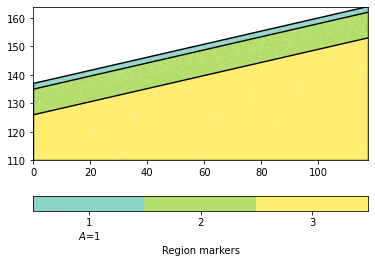

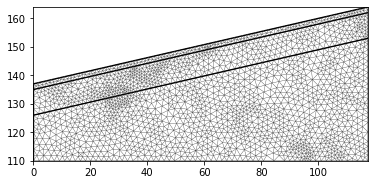

In [7]:
layer1 = mt.createPolygon([[0.0, 137], [117.5, 164], [117.5, 162], [0.0, 135]],
                          isClosed=True, marker=1, area=1)
layer2 = mt.createPolygon([[0.0, 126], [0.0, 135], [117.5, 162], [117.5, 153]],
                          isClosed=True, marker=2)
layer3 = mt.createPolygon([[0.0, 110], [0.0, 126], [117.5, 153], [117.5, 110]],
                          isClosed=True, marker=3)

slope = (164 - 137) / 117.5

geom = layer1 + layer2 + layer3

# If you want no sloped flat earth geometry .. comment out the next 2 lines
# geom = mt.createWorld(start=[0.0, 110], end=[117.5, 137], layers=[137-2, 137-11])
# slope = 0.0

pg.show(geom)

mesh = mt.createMesh(geom, quality=34.3, area=3, smooth=[1, 10])
pg.show(mesh)

(<AxesSubplot:>, None)

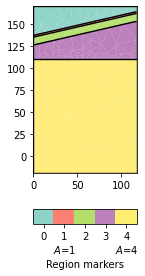

In [8]:
layer0 = mt.createPolygon([[0.0, 170], [117.5, 170], [117.5, 162], [0.0, 135]],
                          isClosed=True, marker=0, area=0)
layer1 = mt.createPolygon([[0.0, 137], [117.5, 164], [117.5, 162], [0.0, 135]],
                          isClosed=True, marker=1, area=1)
layer2 = mt.createPolygon([[0.0, 126], [0.0, 135], [117.5, 162], [117.5, 153]],
                          isClosed=True, marker=2)
layer3 = mt.createPolygon([[0.0, 110], [0.0, 126], [117.5, 153], [117.5, 110]],
                          isClosed=True, marker=3)
layer4 = mt.createPolygon([[0.0,-20],[117.5,-20],[117.5,110],[0.0,110]],
                            isClosed=True, marker=4, area=4)

slope = (164 - 137) / 117.5

geom = layer0 + layer1 + layer2 + layer3 + layer4

# If you want no sloped flat earth geometry .. comment out the next 2 lines
# geom = mt.createWorld(start=[0.0, 110], end=[117.5, 137], layers=[137-2, 137-11])
# slope = 0.0

pg.show(geom)

(<AxesSubplot:>, None)

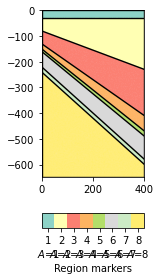

In [9]:
west_edge = 0
east_edge = 400

topo_w = 0
topo_e = 0

glac_base_w = topo_w - 30
glac_base_e = topo_e - 30

sher_base_w = glac_base_w - 50
sher_base_e = glac_base_e - 200

# u_perm_thickness = 
uperm_base_w = sher_base_w - 50
uperm_base_e = sher_base_e - 180
umag_base_w = uperm_base_w - 20
umag_base_e = uperm_base_e - 60
m_perm_base_w = umag_base_w - 10
m_perm_base_e = umag_base_e - 20
l_perm_base_w = m_perm_base_w - 60
l_perm_base_e = m_perm_base_e - 90
basal_perm_sands_base_w = l_perm_base_w - 20
basal_perm_sands_base_e = l_perm_base_e - 20
base_model = basal_perm_sands_base_e - 50


glac = mt.createPolygon([[west_edge,topo_w],[west_edge,glac_base_w],[east_edge,glac_base_e],[east_edge,topo_e]],
                        isClosed=True, marker=1, area=1, markerPosition=[200, west_edge + east_edge /2])
sher = mt.createPolygon([[west_edge,glac_base_w],[west_edge,sher_base_w],[east_edge,sher_base_e],[east_edge,glac_base_e]],
                        isClosed=True, marker=2, area=2, markerPosition=[200, west_edge + east_edge /2])
uperm = mt.createPolygon([[west_edge,sher_base_w],[west_edge,uperm_base_w],[east_edge,uperm_base_e],[east_edge,sher_base_e]],
                        isClosed=True, marker=3, area=3)
umag = mt.createPolygon([[west_edge,uperm_base_w],[west_edge,umag_base_w],[east_edge,umag_base_e],[east_edge,uperm_base_e]],
                        isClosed=True, marker=4, area=4)
m_perm = mt.createPolygon([[west_edge,umag_base_w],[west_edge,m_perm_base_w],[east_edge,m_perm_base_e],[east_edge,umag_base_e]],
                        isClosed=True, marker=5, area=5)
l_perm = mt.createPolygon([[west_edge,m_perm_base_w],[west_edge,l_perm_base_w],[east_edge,l_perm_base_e],[east_edge,m_perm_base_e]],
                        isClosed=True, marker=6, area=6)
basal_perm = mt.createPolygon([[west_edge,l_perm_base_w],[west_edge,basal_perm_sands_base_w],[east_edge,basal_perm_sands_base_e],[east_edge,l_perm_base_e]],
                        isClosed=True, marker=7, area=7)
base_model = mt.createPolygon([[west_edge,basal_perm_sands_base_w],[west_edge,base_model],[east_edge,base_model],[east_edge,basal_perm_sands_base_e]],
                        isClosed=True, marker=8, area=8)



my_geom = glac + sher + uperm + umag + m_perm + l_perm + basal_perm + base_model

pg.show(my_geom, boundaryMarker=True)

Add markerPosition command to kwargs of createPolygon, place a marker in each polygon      

(<AxesSubplot:>, None)

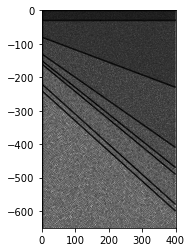

In [10]:
my_mesh = mt.createMesh(my_geom, quality=10, area=2000, smooth=True)
pg.show(my_mesh)

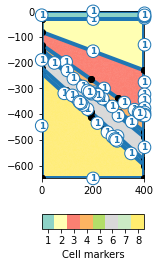

In [11]:
my_mesh = mt.createMesh(my_geom, quality=33.5, area=200, smooth=True)
_ = pg.viewer.showMesh(my_mesh, markers=True)